## **2.2 Dimensionality Reduction – PCA**

**Import PCA**

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

**Apply PCA to scaled features**

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled_df)

**Explained Variance Ratio**

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Show how many components explain 95%+ variance
for i, val in enumerate(cumulative_variance):
    if val >= 0.95:
        print(f"{i+1} components explain {val:.2%} of the variance")
        break

14 components explain 95.26% of the variance


**Plot Cumulative Explained Variance**

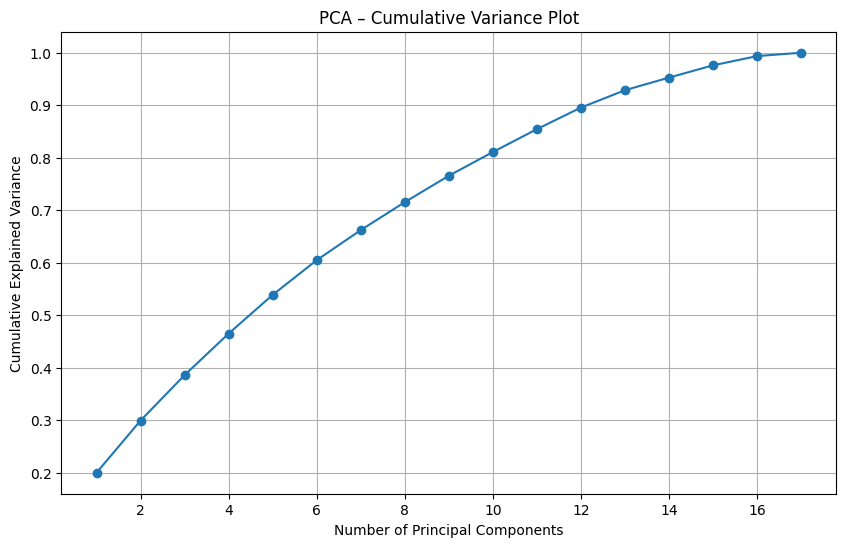

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA – Cumulative Variance Plot')
plt.grid(True)
plt.show()

**Keep only top N principal components (based on 95% variance)**

In [ ]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Using {n_components} components for modeling.")

pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled_df)

# DataFrame for later use
X_pca_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
X_pca_df.head()

Using 14 components for modeling.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.624424,2.333488,4.543250,-1.604958,2.738740,-0.724828,0.761817,-0.057161,-0.051196,0.738019,0.501198,0.411384,-1.503805,0.656852
1,3.498354,1.003786,-1.155979,-0.738627,0.525335,0.538931,0.026676,0.158779,-0.388074,-0.640970,-0.076394,0.571267,1.475359,-1.147836
2,3.356980,-0.641883,-0.449789,0.334651,-0.243912,0.584765,-0.031545,0.606815,-0.979674,-0.080113,-0.684540,0.172536,0.544689,0.095641
3,-1.711493,0.301157,3.809847,0.858846,-1.210634,-2.522992,-0.138176,0.823493,-0.851944,0.596199,1.298354,-0.933126,0.178927,-0.873919
4,-2.530539,-0.426113,-0.026569,-1.733097,0.192386,-0.672647,0.028684,1.207758,0.041802,0.147914,-1.153141,-1.189148,0.732489,0.376575


### ✅ Deliverables:

- `X_pca_df`: dataset reduced to top principal components
- Plot: cumulative explained variance
- Insight: how many PCs retain 95% of data variance

**Next Step:** 2.3 Feature Selection (RFE, Chi-Square, Importance Scores)